#Importing the required libraries

In [ ]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as matplt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
# Setting random seeds for reproducibility
import random
import os
SEED = 42
random.seed(SEED)
nmp.random.seed(SEED)
tf.random.set_seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
print(f"Seeds set to {SEED}")
import warnings
warnings.filterwarnings("ignore")

Seeds set to 42


#Data loading

In [ ]:
data_path = "/content/cardio_data_processed.csv"
df_health = pnd.read_csv(data_path)


In [ ]:
df_health.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df_health.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [ ]:
df_health.shape

(68205, 17)

In [ ]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
df_health.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df_health.duplicated().sum()

np.int64(0)

In [ ]:
df_health.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68205.0,49972.410498,28852.138290,0.000000,24991.000000,50008.000000,74878.000000,99999.000000
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000


#Exploratory Data analysis

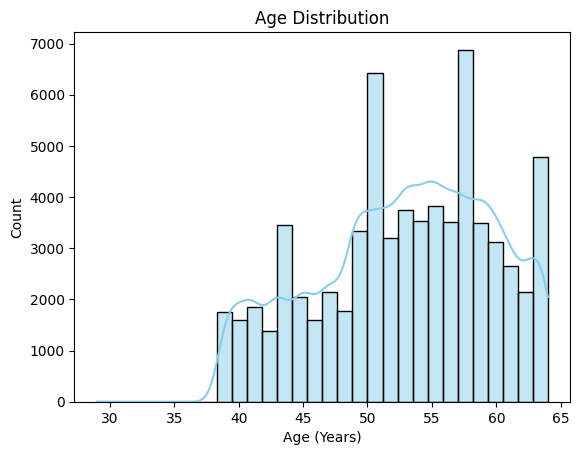

In [ ]:
sea.histplot(df_health['age_years'], kde=True, bins=30, color='skyblue')
matplt.title("Age Distribution")
matplt.xlabel("Age (Years)")
matplt.ylabel("Count")
matplt.show()


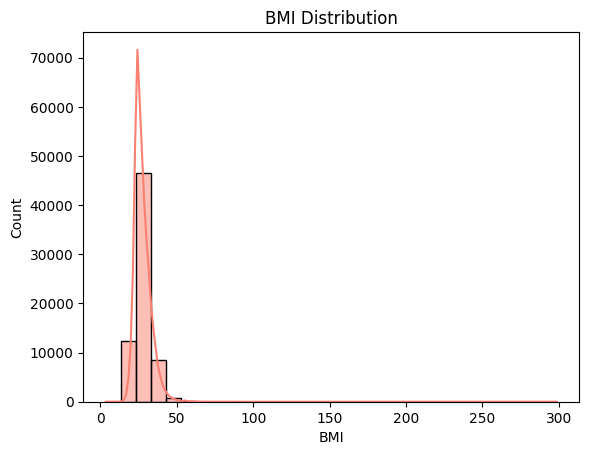

In [ ]:
sea.histplot(df_health['bmi'], kde=True, bins=30, color='salmon')
matplt.title("BMI Distribution")
matplt.xlabel("BMI")
matplt.ylabel("Count")
matplt.show()


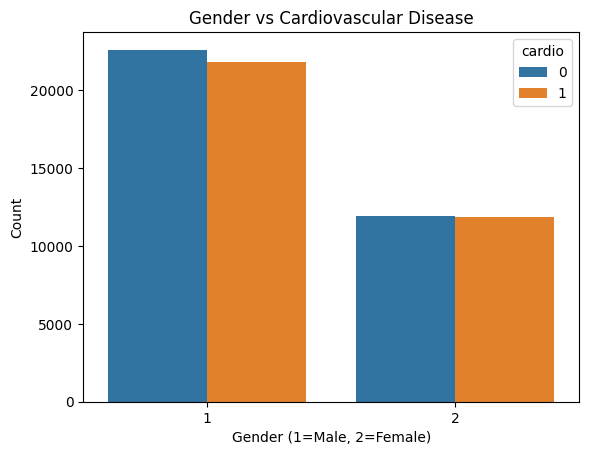

In [ ]:
sea.countplot(x='gender', hue='cardio', data=df_health)
matplt.title("Gender vs Cardiovascular Disease")
matplt.xlabel("Gender (1=Male, 2=Female)")
matplt.ylabel("Count")
matplt.show()

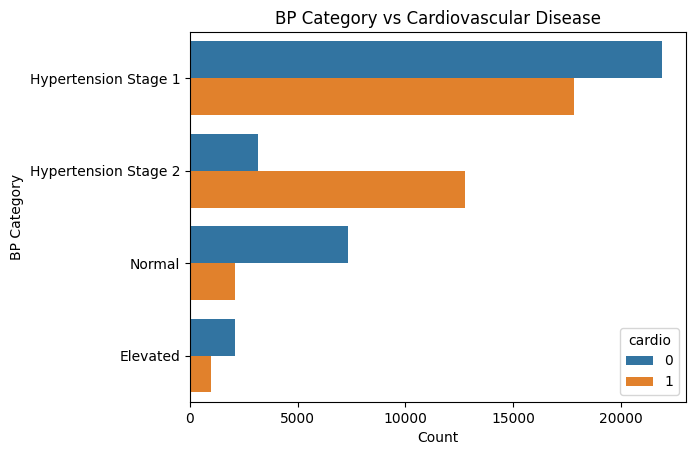

In [ ]:
sea.countplot(y='bp_category', hue='cardio', data=df_health)
matplt.title("BP Category vs Cardiovascular Disease")
matplt.xlabel("Count")
matplt.ylabel("BP Category")
matplt.show()


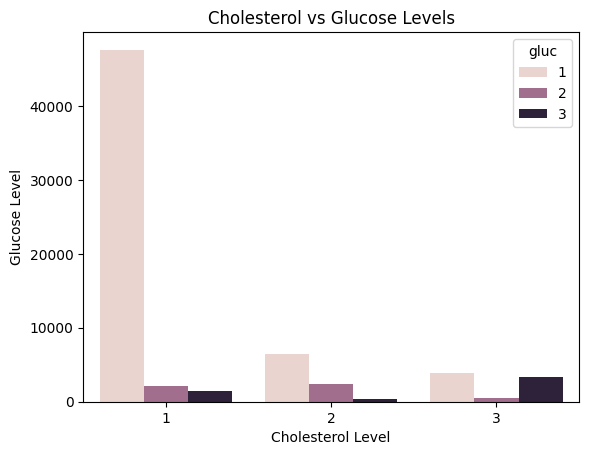

In [ ]:
sea.countplot(x='cholesterol', hue='gluc', data=df_health)
matplt.title("Cholesterol vs Glucose Levels")
matplt.xlabel("Cholesterol Level")
matplt.ylabel("Glucose Level")
matplt.show()

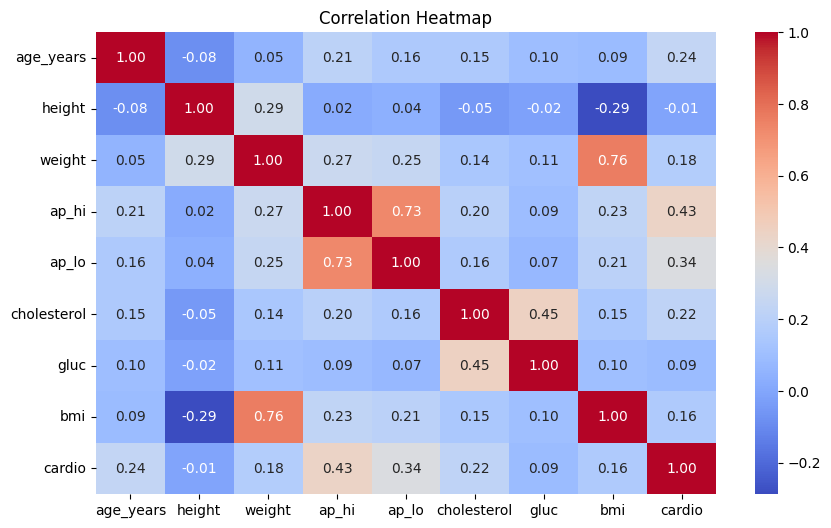

In [ ]:
features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'bmi', 'cardio']
matplt.figure(figsize=(10, 6))
sea.heatmap(df_health[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
matplt.title("Correlation Heatmap")
matplt.show()

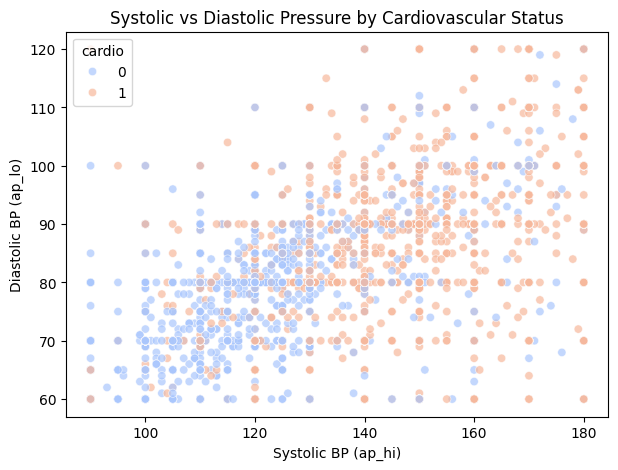

In [ ]:
matplt.figure(figsize=(7,5))
sea.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=df_health, palette="coolwarm", alpha=0.7)
matplt.title("Systolic vs Diastolic Pressure by Cardiovascular Status")
matplt.xlabel("Systolic BP (ap_hi)")
matplt.ylabel("Diastolic BP (ap_lo)")
matplt.show()


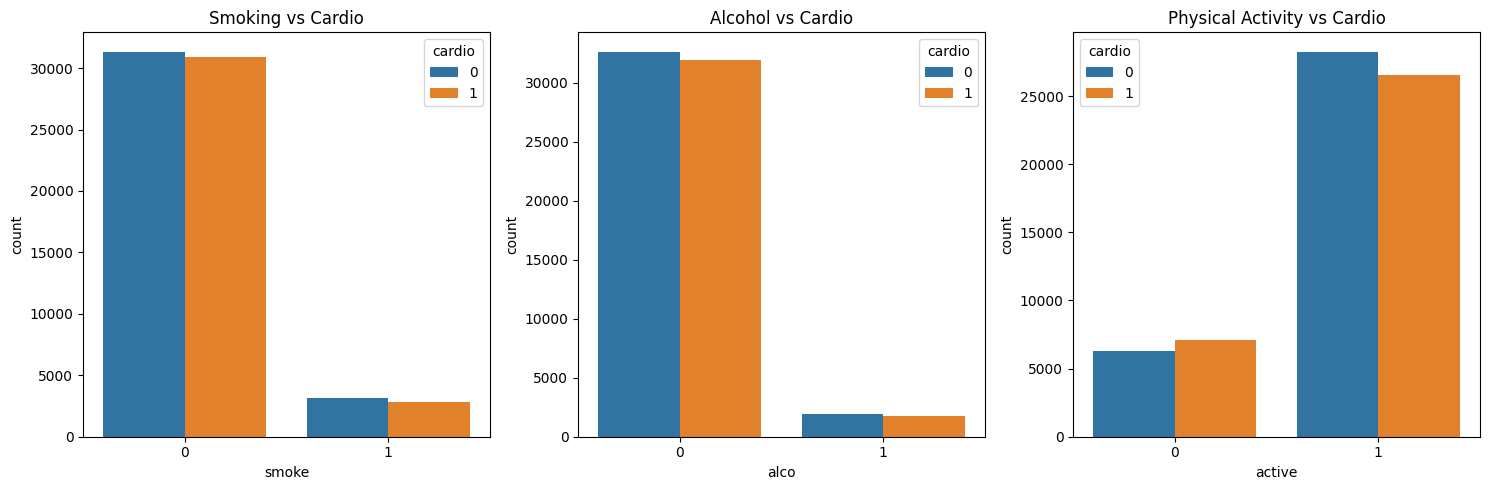

In [ ]:
fig, ax = matplt.subplots(1, 3, figsize=(15, 5))
sea.countplot(x='smoke', hue='cardio', data=df_health, ax=ax[0])
ax[0].set_title("Smoking vs Cardio")
sea.countplot(x='alco', hue='cardio', data=df_health, ax=ax[1])
ax[1].set_title("Alcohol vs Cardio")
sea.countplot(x='active', hue='cardio', data=df_health, ax=ax[2])
ax[2].set_title("Physical Activity vs Cardio")
matplt.tight_layout()
matplt.show()

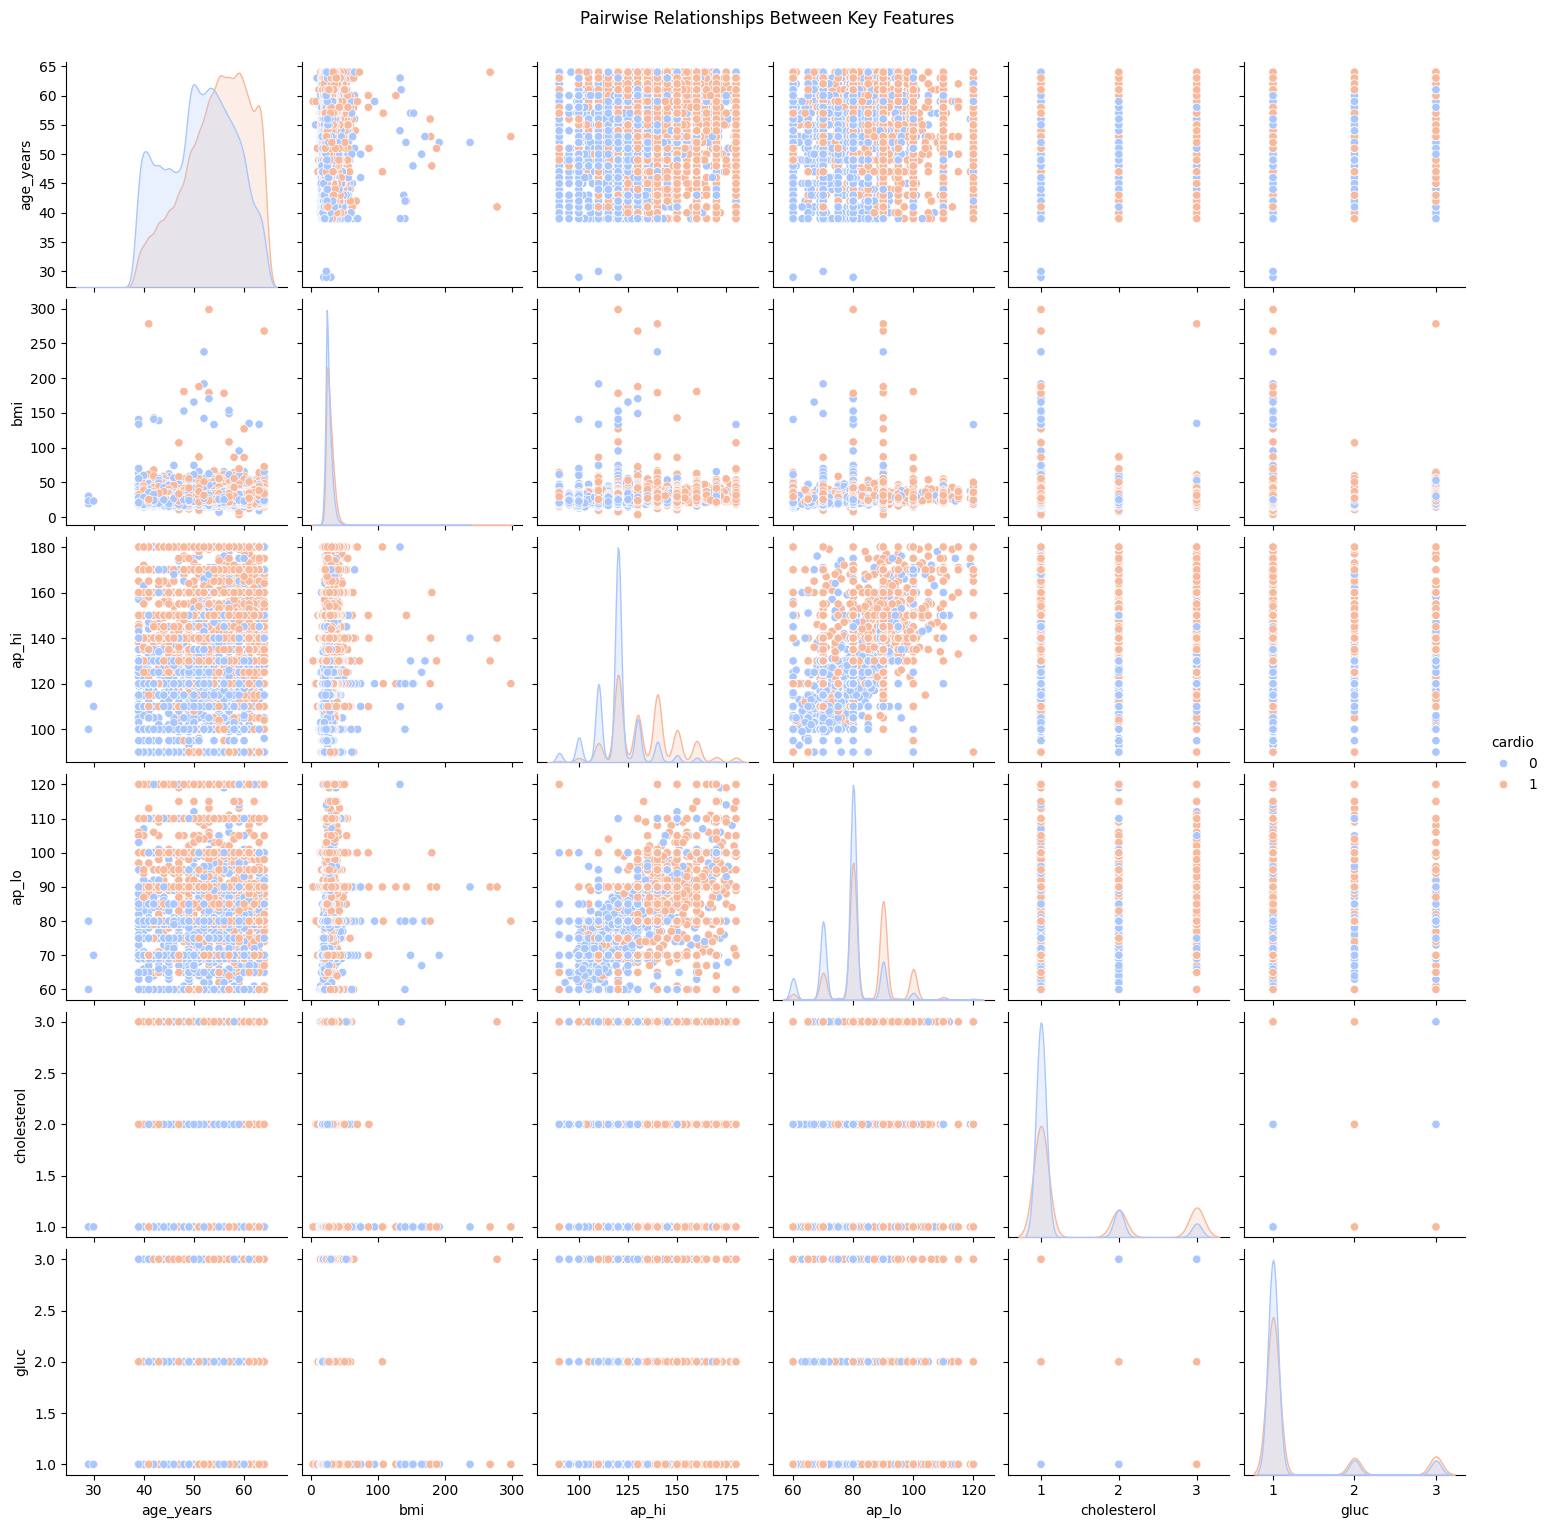

In [ ]:
sea.pairplot(df_health[['age_years','bmi','ap_hi','ap_lo','cholesterol','gluc','cardio']],
             hue="cardio", palette="coolwarm", diag_kind="kde")
matplt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
matplt.show()


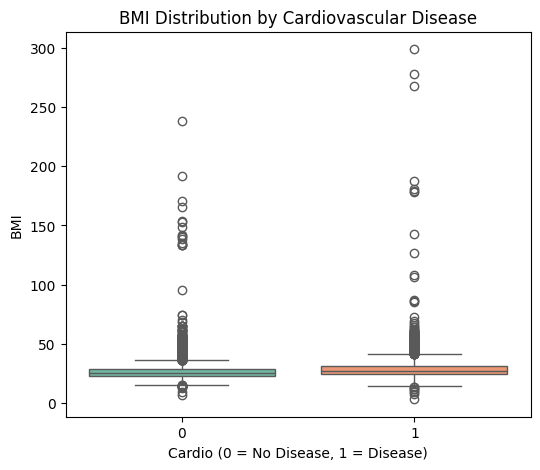

In [ ]:
matplt.figure(figsize=(6,5))
sea.boxplot(x="cardio", y="bmi", data=df_health, palette="Set2")
matplt.title("BMI Distribution by Cardiovascular Disease")
matplt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
matplt.ylabel("BMI")
matplt.show()


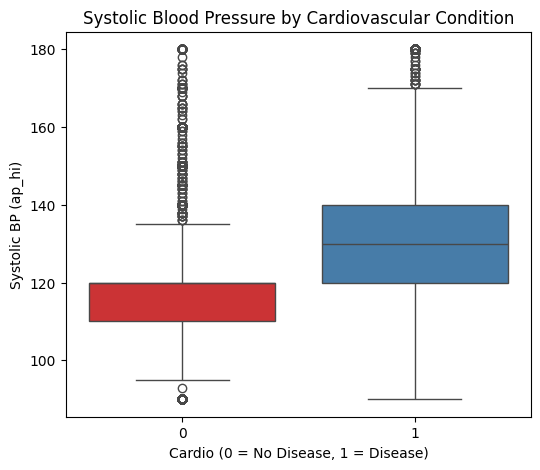

In [ ]:
matplt.figure(figsize=(6,5))
sea.boxplot(x="cardio", y="ap_hi", data=df_health, palette="Set1")
matplt.title("Systolic Blood Pressure by Cardiovascular Condition")
matplt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
matplt.ylabel("Systolic BP (ap_hi)")
matplt.show()


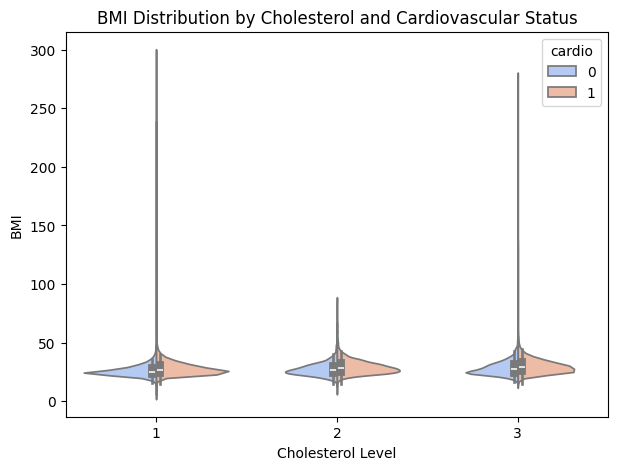

In [ ]:
matplt.figure(figsize=(7,5))
sea.violinplot(x="cholesterol", y="bmi", hue="cardio", data=df_health, split=True, palette="coolwarm")
matplt.title("BMI Distribution by Cholesterol and Cardiovascular Status")
matplt.xlabel("Cholesterol Level")
matplt.ylabel("BMI")
matplt.show()


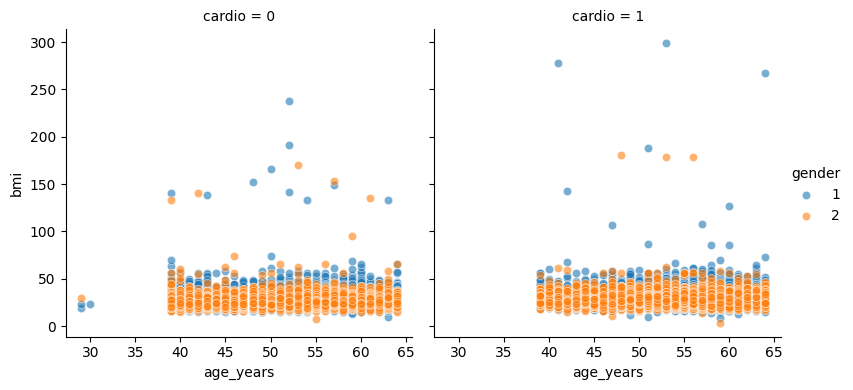

In [ ]:
g = sea.FacetGrid(df_health, col="cardio", hue="gender", height=4)
g.map(sea.scatterplot, "age_years", "bmi", alpha=0.6)
g.add_legend()
matplt.show()


#Data preparation and Model Building

In [ ]:
X = df_health[['age_years', 'height', 'weight', 'ap_hi', 'ap_lo',
          'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']]
y = df_health['cardio']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

best_rf.fit(X_train_s, y_train)

y_pred_rf_best = best_rf.predict(X_test_s)
y_prob_rf_best = best_rf.predict_proba(X_test_s)[:, 1]


In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf_best)
prec_rf = precision_score(y_test, y_pred_rf_best)
rec_rf = recall_score(y_test, y_pred_rf_best)
f1_rf = f1_score(y_test, y_pred_rf_best)
auc_rf = roc_auc_score(y_test, y_prob_rf_best)

print(" RANDOM FOREST RESULTS ")
print("Accuracy:", round(acc_rf, 4))
print("Precision:", round(prec_rf, 4))
print("Recall:", round(rec_rf, 4))
print("F1 Score:", round(f1_rf, 4))
print("AUC-ROC:", round(auc_rf, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))

 RANDOM FOREST RESULTS 
Accuracy: 0.7359
Precision: 0.7619
Recall: 0.6763
F1 Score: 0.7165
AUC-ROC: 0.8019

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6907
           1       0.76      0.68      0.72      6734

    accuracy                           0.74     13641
   macro avg       0.74      0.74      0.73     13641
weighted avg       0.74      0.74      0.73     13641



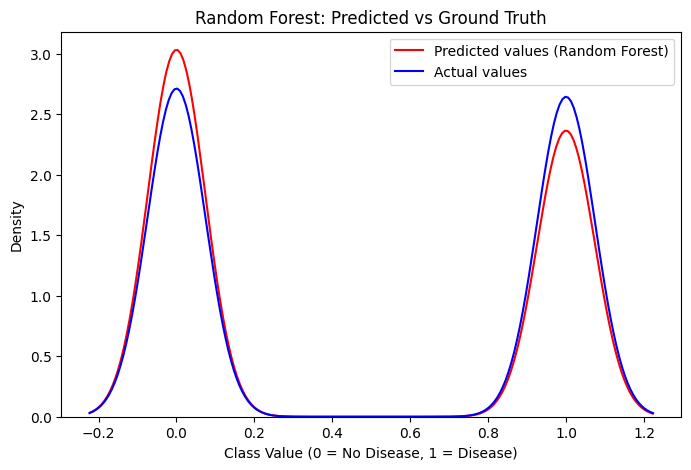

In [ ]:
matplt.figure(figsize=(8,5))
sea.kdeplot(y_pred_rf_best, fill=False, color='r', label="Predicted values (Random Forest)")
sea.kdeplot(y_test, fill=False, color='b', label="Actual values")
matplt.title("Random Forest: Predicted vs Ground Truth")
matplt.xlabel("Class Value (0 = No Disease, 1 = Disease)")
matplt.ylabel("Density")
matplt.legend(loc="upper right")
matplt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

rf_grid.fit(X_train_s, y_train)

best_rf = rf_grid.best_estimator_
print("Best RF params:", rf_grid.best_params_)
print("Best RF AUC:", rf_grid.best_score_)


Best RF params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best RF AUC: 0.799236857387345


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

print("Tuned Random Forest AUC:",
      roc_auc_score(y_test, y_prob_rf_best))

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf_best))

print(classification_report(y_test, y_pred_rf_best))


Tuned Random Forest AUC: 0.8019304073307257
Tuned Random Forest Accuracy: 0.7358698042665494
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6907
           1       0.76      0.68      0.72      6734

    accuracy                           0.74     13641
   macro avg       0.74      0.74      0.73     13641
weighted avg       0.74      0.74      0.73     13641



In [ ]:
best_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    subsample=1.0,
    eval_metric="logloss",
    random_state=42
)

best_xgb.fit(X_train_s, y_train)

y_pred_xgb_best = best_xgb.predict(X_test_s)
y_prob_xgb_best = best_xgb.predict_proba(X_test_s)[:, 1]


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

print("Tuned XGBoost AUC:",
      roc_auc_score(y_test, y_prob_xgb_best))

print("Tuned XGBoost Accuracy:",
      accuracy_score(y_test, y_pred_xgb_best))

print(classification_report(y_test, y_pred_xgb_best))


Tuned XGBoost AUC: 0.8026174704544474
Tuned XGBoost Accuracy: 0.7352100285902793
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6907
           1       0.76      0.68      0.72      6734

    accuracy                           0.74     13641
   macro avg       0.74      0.73      0.73     13641
weighted avg       0.74      0.74      0.73     13641



In [ ]:
acc_xgb = accuracy_score(y_test, y_pred_xgb_best)
prec_xgb = precision_score(y_test, y_pred_xgb_best)
rec_xgb = recall_score(y_test, y_pred_xgb_best)
f1_xgb = f1_score(y_test, y_pred_xgb_best)
auc_xgb = roc_auc_score(y_test, y_prob_xgb_best)

print("\n XGBOOST RESULTS ")
print("Accuracy:", round(acc_xgb, 4))
print("Precision:", round(prec_xgb, 4))
print("Recall:", round(rec_xgb, 4))
print("F1 Score:", round(f1_xgb, 4))
print("AUC-ROC:", round(auc_xgb, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_best))


 XGBOOST RESULTS 
Accuracy: 0.7352
Precision: 0.76
Recall: 0.6776
F1 Score: 0.7164
AUC-ROC: 0.8026

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6907
           1       0.76      0.68      0.72      6734

    accuracy                           0.74     13641
   macro avg       0.74      0.73      0.73     13641
weighted avg       0.74      0.74      0.73     13641



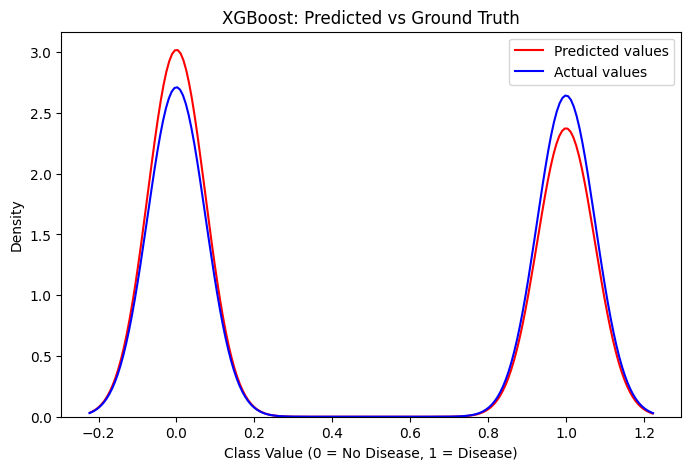

In [ ]:
matplt.figure(figsize=(8,5))
sea.kdeplot(y_pred_xgb_best, fill=False, color='r', label="Predicted values")
sea.kdeplot(y_test, fill=False, color='b', label="Actual values")
matplt.title("XGBoost: Predicted vs Ground Truth")
matplt.xlabel("Class Value (0 = No Disease, 1 = Disease)")
matplt.ylabel("Density")
matplt.legend(loc="upper right")
matplt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(
        eval_metric="logloss",
        random_state=42
    ),
    xgb_param_dist,
    n_iter=10,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)

xgb_search.fit(X_train_s, y_train)

best_xgb = xgb_search.best_estimator_
print("Best XGB params:", xgb_search.best_params_)
print("Best XGB AUC:", xgb_search.best_score_)


Best XGB params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}
Best XGB AUC: 0.8001293866487055


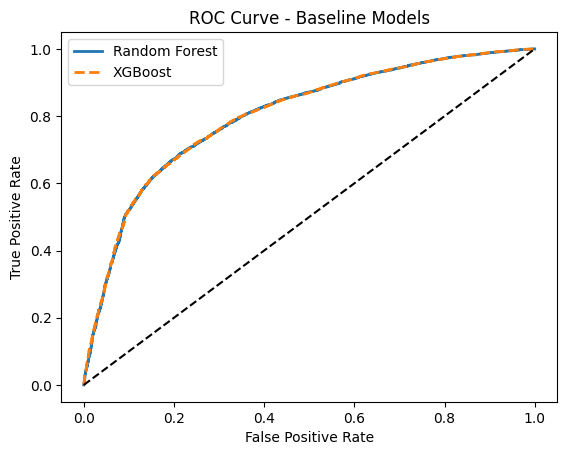

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_best)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb_best)

matplt.plot(fpr_rf, tpr_rf, label='Random Forest', linewidth=2)
matplt.plot(fpr_xgb, tpr_xgb, label='XGBoost', linestyle='--', linewidth=2)
matplt.plot([0, 1], [0, 1], 'k--')
matplt.title("ROC Curve - Baseline Models")
matplt.xlabel("False Positive Rate")
matplt.ylabel("True Positive Rate")
matplt.legend()
matplt.show()


#Attention based Neural Network Model

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

# Convert to torch tensors
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)


In [ ]:
class HeartNN(nn.Module):
    def __init__(self, input_dim):
        super(HeartNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HeartNN(input_dim=X_train_t.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
train_losses, val_losses = [], []
train_accs, val_accs = [], []


In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t.to(device))
    loss = criterion(outputs, y_train_t.to(device))
    loss.backward()
    optimizer.step()

    # Train metrics
    preds = (outputs > 0.5).float()
    train_acc = (preds.cpu() == y_train_t).float().mean().item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_t.to(device))
        val_loss = criterion(val_outputs, y_val_t.to(device))
        val_preds = (val_outputs > 0.5).float()
        val_acc = (val_preds.cpu() == y_val_t).float().mean().item()

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")


Epoch [1/50] | Train Loss: 0.6879 | Val Loss: 0.6848 | Train Acc: 0.5962 | Val Acc: 0.6706
Epoch [2/50] | Train Loss: 0.6854 | Val Loss: 0.6823 | Train Acc: 0.6217 | Val Acc: 0.6806
Epoch [3/50] | Train Loss: 0.6833 | Val Loss: 0.6799 | Train Acc: 0.6384 | Val Acc: 0.6858
Epoch [4/50] | Train Loss: 0.6807 | Val Loss: 0.6774 | Train Acc: 0.6513 | Val Acc: 0.6920
Epoch [5/50] | Train Loss: 0.6782 | Val Loss: 0.6749 | Train Acc: 0.6638 | Val Acc: 0.6969
Epoch [6/50] | Train Loss: 0.6759 | Val Loss: 0.6724 | Train Acc: 0.6709 | Val Acc: 0.7011
Epoch [7/50] | Train Loss: 0.6734 | Val Loss: 0.6698 | Train Acc: 0.6760 | Val Acc: 0.7040
Epoch [8/50] | Train Loss: 0.6708 | Val Loss: 0.6671 | Train Acc: 0.6823 | Val Acc: 0.7063
Epoch [9/50] | Train Loss: 0.6684 | Val Loss: 0.6644 | Train Acc: 0.6858 | Val Acc: 0.7083
Epoch [10/50] | Train Loss: 0.6656 | Val Loss: 0.6616 | Train Acc: 0.6901 | Val Acc: 0.7094
Epoch [11/50] | Train Loss: 0.6630 | Val Loss: 0.6588 | Train Acc: 0.6919 | Val Acc: 0.71

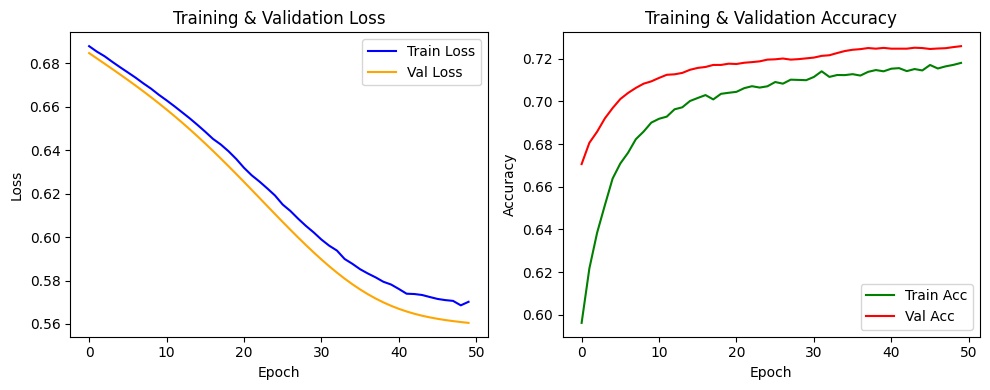

In [ ]:
matplt.figure(figsize=(10,4))
matplt.subplot(1,2,1)
matplt.plot(train_losses, label='Train Loss', color='blue')
matplt.plot(val_losses, label='Val Loss', color='orange')
matplt.xlabel('Epoch')
matplt.ylabel('Loss')
matplt.title('Training & Validation Loss')
matplt.legend()

matplt.subplot(1,2,2)
matplt.plot(train_accs, label='Train Acc', color='green')
matplt.plot(val_accs, label='Val Acc', color='red')
matplt.xlabel('Epoch')
matplt.ylabel('Accuracy')
matplt.title('Training & Validation Accuracy')
matplt.legend()
matplt.tight_layout()
matplt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_final = (model(X_val_t.to(device)) > 0.5).float().cpu().numpy()

acc_final = accuracy_score(y_val, y_pred_final)
print(f"\n Final Validation Accuracy: {acc_final:.4f}")



 Final Validation Accuracy: 0.7259


In [ ]:
from sklearn.preprocessing import RobustScaler
X = df_health[['age_years', 'height', 'weight', 'ap_hi', 'ap_lo',
               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']]
y = df_health['cardio']


X['age_chol'] = X['age_years'] * X['cholesterol']
X['bmi_aphi'] = X['bmi'] * X['ap_hi']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)


X_train_s = X_train_s[..., None]
X_val_s = X_val_s[..., None]


In [ ]:
from tensorflow.keras import layers, models, regularizers, optimizers, callbacks
def multi_head_attention_block(inputs, num_heads=4, key_dim=16):
    mha = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=key_dim,
        output_shape=None
    )

    attn_out, attn_scores = mha(
        inputs, inputs,
        return_attention_scores=True
    )

    attn_out = layers.Add()([inputs, attn_out])
    attn_out = layers.LayerNormalization()(attn_out)

    return attn_out, attn_scores



input_layer = layers.Input(shape=(X_train_s.shape[1], 1))

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x, attn_scores = multi_head_attention_block(x, num_heads=4, key_dim=16)

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)


x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(
    inputs=input_layer,
    outputs=output_layer
)

optimizer = optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 13, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 13, 128)   │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 128)   │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 13, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 13, 128), │     33,088 │ dropout[0][0],    │
│ (MultiHeadAttentio… │ (None, 4, 13,     │            │ dropout[0][0]     │
│                     │ 13)]              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 128)   │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 13, 128)   │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 13, 64)    │      8,256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 64)    │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 13, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 832)       │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     53,312 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 96,001 (375.00 KB)

 Trainable params: 95,617 (373.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
early_stop = callbacks.EarlyStopping(
    monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_auc', factor=0.5, patience=5, mode='max', min_lr=1e-6)


from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced', classes=nmp.unique(y_train), y=y_train)
cw_dict = dict(enumerate(class_weights))

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=80,
    batch_size=64,
    class_weight=cw_dict,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)




Epoch 1/80
853/853 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.6940 - auc: 0.7474 - loss: 0.6400 - val_accuracy: 0.7290 - val_auc: 0.7959 - val_loss: 0.5571 - learning_rate: 0.0010
Epoch 2/80


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predicted probabilities on validation set
y_val_pred = model.predict(X_val_s).ravel()

# Convert probabilities to class labels
y_val_pred_bin = (y_val_pred > 0.5).astype(int)

# Print classification report
print("Classification Report – Attention-Based Neural Network\n")
print(classification_report(
    y_val,
    y_val_pred_bin,
    target_names=["No CVD", "CVD"]
))


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

acc = accuracy_score(y_val, y_val_pred_bin)
auc = roc_auc_score(y_val, y_val_pred)

print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation AUC-ROC: {auc:.4f}")


In [ ]:
import os

# Create folder in Colab runtime
os.makedirs("models", exist_ok=True)

# Save model
model.save("models/attention_model.keras")

# Save scaler
import joblib
joblib.dump(scaler, "models/scaler.pkl")

print("Saved successfully")


In [ ]:
matplt.figure(figsize=(10,4))
matplt.subplot(1,2,1)
matplt.plot(history.history['loss'], label='Train Loss', color='blue')
matplt.plot(history.history['val_loss'], label='Val Loss', color='orange')
matplt.xlabel('Epoch')
matplt.ylabel('Loss')
matplt.legend()
matplt.title('Loss Over Epochs')

matplt.subplot(1,2,2)
matplt.plot(history.history['accuracy'], label='Train Acc', color='green')
matplt.plot(history.history['val_accuracy'], label='Val Acc', color='red')
matplt.xlabel('Epoch')
matplt.ylabel('Accuracy')
matplt.legend()
matplt.title('Accuracy Over Epochs')
matplt.tight_layout()
matplt.show()

In [ ]:
y_val_pred = model.predict(X_val_s).ravel()
auc = roc_auc_score(y_val, y_val_pred)
print(f"AUC-ROC: {auc:.4f}")
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
matplt.figure(figsize=(5,5))
matplt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.3f}')
matplt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
matplt.xlabel('False Positive Rate')
matplt.ylabel('True Positive Rate')
matplt.title('ROC Curve')
matplt.legend()
matplt.show()


##Residual MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def residual_block(x, units):
    shortcut = x
    x = layers.Dense(units, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(units,
                     kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([shortcut, x])
    x = layers.ReLU()(x)
    return x

input_layer = layers.Input(shape=(X_train_s.shape[1],))

x = layers.Dense(128, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)

x = residual_block(x, 128)
x = residual_block(x, 128)

x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)

output_layer = layers.Dense(1, activation='sigmoid')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)
resnet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

resnet_model.summary()


In [ ]:
history_resnet = resnet_model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


In [ ]:
y_pred_resnet = resnet_model.predict(X_val_s).ravel()

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

acc_res = accuracy_score(y_val, y_pred_resnet > 0.5)
auc_res = roc_auc_score(y_val, y_pred_resnet)

print("ResNet-MLP Accuracy:", acc_res)
print("ResNet-MLP AUC:", auc_res)
print(classification_report(y_val, y_pred_resnet > 0.5))


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("ResNet-MLP Loss")
plt.show()

plt.plot(history_resnet.history['accuracy'], label='Train Acc')
plt.plot(history_resnet.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("ResNet-MLP Accuracy")
plt.show()


In [ ]:
import os
os.makedirs("models", exist_ok=True)

resnet_model.save("models/resnet_mlp_model.keras")


In [ ]:
import pandas as pd
import numpy as np

results = {
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf_best),
        "Precision": precision_score(y_test, y_pred_rf_best),
        "Recall": recall_score(y_test, y_pred_rf_best),
        "F1 Score": f1_score(y_test, y_pred_rf_best),
        "AUC": roc_auc_score(y_test, y_prob_rf_best)
    },

    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb_best),
        "Precision": precision_score(y_test, y_pred_xgb_best),
        "Recall": recall_score(y_test, y_pred_xgb_best),
        "F1 Score": f1_score(y_test, y_pred_xgb_best),
        "AUC": roc_auc_score(y_test, y_prob_xgb_best)
    },

    "PyTorch MLP": {
        "Accuracy": accuracy_score(y_val, y_pred_final),
        "Precision": precision_score(y_val, y_pred_final),
        "Recall": recall_score(y_val, y_pred_final),
        "F1 Score": f1_score(y_val, y_pred_final),
        "AUC": np.nan
    },

    "Attention Model": {
        "Accuracy": accuracy_score(y_val, (y_val_pred > 0.5)),
        "Precision": precision_score(y_val, (y_val_pred > 0.5)),
        "Recall": recall_score(y_val, (y_val_pred > 0.5)),
        "F1 Score": f1_score(y_val, (y_val_pred > 0.5)),
        "AUC": roc_auc_score(y_val, y_val_pred)
    },

    "ResNet-MLP": {
        "Accuracy": accuracy_score(y_val, (y_pred_resnet > 0.5)),
        "Precision": precision_score(y_val, (y_pred_resnet > 0.5)),
        "Recall": recall_score(y_val, (y_pred_resnet > 0.5)),
        "F1 Score": f1_score(y_val, (y_pred_resnet > 0.5)),
        "AUC": roc_auc_score(y_val, y_pred_resnet)
    }
}

results_df = pd.DataFrame(results).T
results_df


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".4f")
plt.title("Model Performance Comparison")
plt.show()


In [ ]:
plt.figure(figsize=(16,8))

ax = results_df.plot(
    kind="bar",
    figsize=(16,8),
    width=0.75,
    fontsize=12
)

plt.title("Model Comparison Across Metrics", fontsize=18)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)

plt.xticks(rotation=0, fontsize=12)

# Move legend outside
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=12)

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f"{height:.3f}",
                    (p.get_x() + p.get_width()/2, height),
                    ha='center',
                    va='bottom',
                    fontsize=11,
                    rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(7,7))

# RF
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label="Random Forest")

# XGB
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label="XGBoost")

# Attention
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr, label="Attention Model")

# ResNet-MLP
fpr, tpr, _ = roc_curve(y_val, y_pred_resnet)
plt.plot(fpr, tpr, label="ResNet-MLP")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No CVD", "CVD"],
        yticklabels=["No CVD", "CVD"],
        annot_kws={"size": 14}
    )

    plt.xlabel("Predicted", fontsize=13)
    plt.ylabel("Actual", fontsize=13)
    plt.title(title, fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_confusion_matrix(
    y_test,
    y_pred_rf_best,
    "Confusion Matrix – Random Forest"
)


In [ ]:
plot_confusion_matrix(
    y_test,
    y_pred_xgb_best,
    "Confusion Matrix – XGBoost"
)


In [ ]:
plot_confusion_matrix(
    y_val,
    y_pred_final,
    "Confusion Matrix – PyTorch MLP"
)


In [ ]:
y_val_pred_bin = (y_val_pred > 0.5).astype(int)


In [ ]:
plot_confusion_matrix(
    y_val,
    y_val_pred_bin,
    "Confusion Matrix – Attention-Based Model"
)


In [ ]:
y_pred_resnet_bin = (y_pred_resnet > 0.5).astype(int)

plot_confusion_matrix(
    y_val,
    y_pred_resnet_bin,
    "Confusion Matrix – ResNet-MLP"
)


In [ ]:
FEATURE_NAMES = [
    "age_years",
    "height",
    "weight",
    "ap_hi",
    "ap_lo",
    "cholesterol",
    "gluc",
    "smoke",
    "alco",
    "active",
    "bmi",
    "age_chol",
    "bmi_aphi"
]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

def compute_attention_importance(model, X_input, feature_names):
    x_tensor = tf.convert_to_tensor(X_input, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        pred = model(x_tensor, training=False)
        prob = tf.squeeze(pred)

    grads = tape.gradient(prob, x_tensor)

    # Aggregate across channel dimension
    importance = np.mean(np.abs(grads.numpy()), axis=(0, 2))
    importance = importance / (importance.sum() + 1e-8)

    return pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)


In [ ]:
X_input = X_val_s[0:1]


In [ ]:
importance_df = compute_attention_importance(
    model,
    X_input,
    FEATURE_NAMES
)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 4))
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature"
)
plt.title("Attention-Informed Feature Importance")
plt.xlabel("Normalized Importance")
plt.ylabel("Clinical Feature")
plt.tight_layout()
plt.show()
